<a href="https://colab.research.google.com/github/Dhanush-adk/ITCS-5156_Project/blob/main/ClassicalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv(r"https://raw.githubusercontent.com/Dhanush-adk/ITCS-5156_Project/main/Data/train_dataframe.csv")
removed_column = data.pop('label')
Y = pd.DataFrame({'age group': removed_column})
X = data
X.shape

(30694, 23)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [5]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y_train, encoder = get_labels(y_train)
y_test = encoder.transform(y_test)
y_test = y_test.ravel()
y_train = y_train.ravel()
y_test[:50]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([7, 6, 5, 7, 6, 2, 6, 2, 1, 7, 7, 7, 7, 7, 1, 2, 1, 1, 7, 7, 7, 7,
       2, 7, 7, 1, 7, 6, 6, 2, 7, 7, 6, 1, 7, 7, 7, 6, 6, 2, 4, 7, 4, 4,
       2, 6, 2, 1, 7, 4])

In [6]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
n = X.shape[1]

In [7]:
# Linear Regression
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_linear = linear_reg_model.predict(x_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")

# If you want to access the coefficients and intercept:
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Accuracy for regression is not applicable, but you can print R-squared
r_squared = linear_reg_model.score(x_test, y_test)
print(f"R-squared (Linear Regression): {r_squared}")


Mean Squared Error (Linear Regression): 4.804320480908511
Coefficients: [ 0.15000174  0.1043299  -0.27097678 -0.08023008  0.28948891 -0.12130669
 -0.0732612   0.11025026  0.00434379  0.06684405 -0.03585631  0.10070212
 -0.11593581  0.11862989 -0.17734749 -0.16469746 -0.16635832  0.1544722
  0.05003557  0.21594054  0.0556797   0.13340348 -0.17309452]
Intercept: 4.788556302178782
R-squared (Linear Regression): 0.048773075337680605


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.35510669490144975
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.31      0.09      0.14       772
           2       0.30      0.10      0.15       923
           3       0.33      0.01      0.01       138
           4       0.32      0.07      0.12       389
           5       0.32      0.03      0.05       480
           6       0.32      0.39      0.35      1487
           7       0.38      0.72      0.50      1932

    accuracy                           0.36      6139
   macro avg       0.28      0.18      0.16      6139
weighted avg       0.33      0.36      0.29      6139

Confusion Matrix (Logistic Regression):
 [[   0    2    0    0    1    0    3   12]
 [   1   68   50    0   10    3  277  363]
 [   0   30   92    1   21    3  220  556]
 [   1    2    5    1    2    0   53   74]
 [   0   25   22    0   28    3  126  

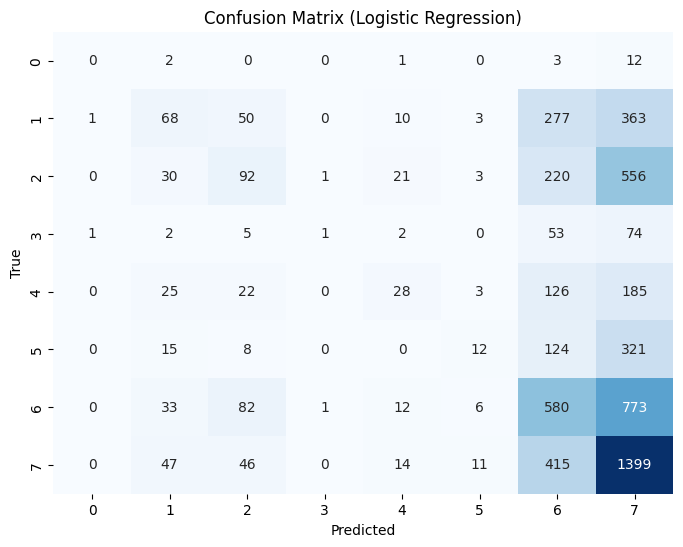

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Logistic Regression
logistic_reg_model = LogisticRegression()

# Training the model
logistic_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_logistic = logistic_reg_model.predict(x_test)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy (Logistic Regression): {accuracy_logistic}")
print("Classification Report (Logistic Regression):\n", classification_report_logistic)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=logistic_reg_model.classes_, yticklabels=logistic_reg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Accuracy (SVC with RBF kernel): 0.7797686919693761
Classification Report (SVC with RBF kernel):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.78      0.78      0.78       772
           2       0.79      0.76      0.78       923
           3       0.87      0.80      0.83       138
           4       0.85      0.76      0.80       389
           5       0.80      0.59      0.68       480
           6       0.76      0.78      0.77      1487
           7       0.77      0.83      0.80      1932

    accuracy                           0.78      6139
   macro avg       0.83      0.78      0.80      6139
weighted avg       0.78      0.78      0.78      6139

Confusion Matrix (SVC with RBF kernel):
 [[  17    0    0    1    0    0    0    0]
 [   0  603   33    5    4    4   53   70]
 [   0   28  704    2    7   14   71   97]
 [   0    3    2  111    3    0    9   10]
 [   0    9   16    2  295    5   27   

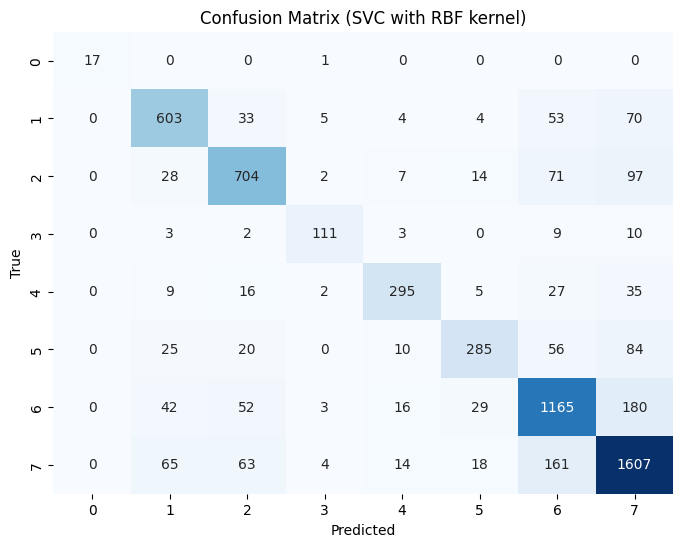

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the SVM model with RBF kernel
svc_model_rbf = SVC(kernel='rbf', C=10)
svc_model_rbf.fit(x_train, y_train)

# Predicting on the test set
y_pred_svc_rbf = svc_model_rbf.predict(x_test)

# Evaluating the model
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
classification_report_svc_rbf = classification_report(y_test, y_pred_svc_rbf)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

print(f"Accuracy (SVC with RBF kernel): {accuracy_svc_rbf}")
print("Classification Report (SVC with RBF kernel):\n", classification_report_svc_rbf)
print("Confusion Matrix (SVC with RBF kernel):\n", conf_matrix_svc_rbf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc_rbf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svc_model_rbf.classes_, yticklabels=svc_model_rbf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC with RBF kernel)')
plt.show()


Accuracy (KNeighborsClassifier): 0.8514416028669164
Classification Report (KNeighborsClassifier):
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.82      0.87      0.84       772
           2       0.85      0.84      0.85       923
           3       0.78      0.91      0.84       138
           4       0.86      0.89      0.87       389
           5       0.85      0.81      0.83       480
           6       0.84      0.86      0.85      1487
           7       0.88      0.84      0.86      1932

    accuracy                           0.85      6139
   macro avg       0.85      0.87      0.86      6139
weighted avg       0.85      0.85      0.85      6139

Confusion Matrix (KNeighborsClassifier):
 [[  17    0    0    1    0    0    0    0]
 [   0  669   18    5   10    8   34   28]
 [   0   30  775    1    4   16   48   49]
 [   0    2    0  126    0    0    2    8]
 [   1    4    7    4  347    3   11

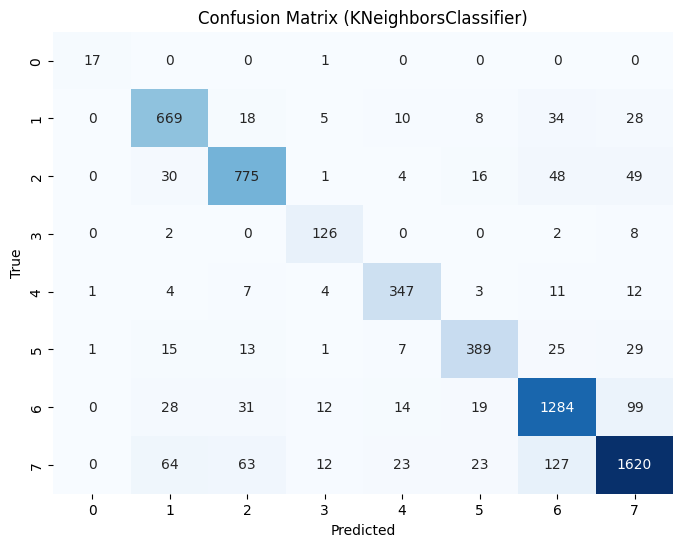

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Create KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=1)  # You can adjust the number of neighbors (n_neighbors) as needed

# Training the model
knn_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy (KNeighborsClassifier): {accuracy_knn}")
print("Classification Report (KNeighborsClassifier):\n", classification_report_knn)
print("Confusion Matrix (KNeighborsClassifier):\n", conf_matrix_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (KNeighborsClassifier)')
plt.show()
